# TD4 - Explainability AI

#### Matias OTTENSEN
#### Tiphaine KACHKACHI
#### Manon GARDIN

# Our dataset 

Petite description du dataset

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sklearn
from sklearn.datasets import load_diabetes

In [80]:
df = pd.read_csv('archive/US_Accidents_March23.csv', sep=',')

## Observe data

In [81]:
df.shape

(7728394, 46)

We have a great number of lines in our dataset.\
Also we have 46 columns, we probably won't need every one of them. Let's see their name :

In [82]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

As the dataframe is huge (almost 3 gb), we decided to work on another version of this dataframe, just to have a sample that we could work on esier:

In [83]:
halfsize=int((df.shape[0])/10)
df = df.iloc[:halfsize,:]
print(df.shape)

(772839, 46)


Variables like Street, City, Zipcode and County won't be useful to keep, because there are too many distinct values.\
The columns Bump, Traffic_calming, Turning_loop, Give_Way, No_Exit, Roundabout can be deleted because they take only one value (all false).\
The variable Country only takes US so we can delete it.\
We can also delete some columns like Airport_Code that won't be relevant.

In [84]:
# Delete the columns we don't need 
df = df.drop(['Street', 'City', 'Description','County', 'Zipcode', 'Country', 'Bump', 'Traffic_Calming', 'Turning_Loop', 'Give_Way', 'No_Exit', 'Roundabout', 'Airport_Code'], axis=1)

In [85]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,False,True,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,False,True,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df.describe

<bound method NDFrame.describe of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        

# Data Cleaning

Missing values:

In [86]:
print(df.isnull().sum())

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  772839
End_Lng                  772839
Distance(mi)                  0
State                         0
Timezone                    262
Weather_Timestamp          7182
Temperature(F)            11731
Wind_Chill(F)            455716
Humidity(%)               12770
Pressure(in)               9344
Visibility(mi)            15302
Wind_Direction             9179
Wind_Speed(mph)           96007
Precipitation(in)        467302
Weather_Condition         14444
Amenity                       0
Crossing                      0
Junction                      0
Railway                       0
Station                       0
Stop                          0
Traffic_Signal                0
Sunrise_Sunset             1631
Civil_Twilight             1631
Nautical

There are missing values, so, what can we do about it?

First, we create a new dataframe to secure the first one if we ever delete the wring values

In [87]:
newdf = df

We had to make a choice for each column on how to handle the missing values. We chose to keep every missing values, we did not delete any rows. We preferred to replace them with values that are easily readable for string values, and to use the average for the numerical values.

In [88]:
#for the end lat/lng : we will fill the NAN by the start lat/lng:

newdf['End_Lat']=newdf['End_Lat'].fillna(newdf['Start_Lat'])
newdf['End_Lng']=newdf['End_Lng'].fillna(newdf['Start_Lng'])

#for the streets/Cities/Description/timezone/Weather_Condition/Sunrise_Sunset/Civil_Twilight/Nautical_Twilight
#and Astronomical_Twilight, we just write "unknown", 
#as we do not want to give fake informations to the person reading

newdf['Timezone']=newdf['Timezone'].fillna('unknown')
newdf['Weather_Condition']=newdf['Weather_Condition'].fillna('unknown')
newdf['Sunrise_Sunset']=newdf['Sunrise_Sunset'].fillna('unknown')
newdf['Civil_Twilight']=newdf['Civil_Twilight'].fillna('unknown')
newdf['Nautical_Twilight']=newdf['Weather_Condition'].fillna('unknown')
newdf['Astronomical_Twilight']=newdf['Astronomical_Twilight'].fillna('unknown')

# for the weather timestamp, we put now's date
newdf['Weather_Timestamp']=newdf['Weather_Timestamp'].fillna(datetime.now())

#temperature/Wind_Chill(F)/Humidity(%)/Pressure(in)/Visibility(mi)/Wind_Speed(mph)/Precipitation(in): we put the mean
newdf['Temperature(F)']=newdf['Temperature(F)'].fillna(newdf['Temperature(F)'].mean())
newdf['Wind_Chill(F)']=newdf['Wind_Chill(F)'].fillna(newdf['Wind_Chill(F)'].mean())
newdf['Humidity(%)']=newdf['Humidity(%)'].fillna(newdf['Humidity(%)'].mean())
newdf['Pressure(in)']=newdf['Pressure(in)'].fillna(newdf['Pressure(in)'].mean())
newdf['Visibility(mi)']=newdf['Visibility(mi)'].fillna(newdf['Visibility(mi)'].mean())
newdf['Wind_Speed(mph)']=newdf['Wind_Speed(mph)'].fillna(newdf['Wind_Speed(mph)'].mean())
newdf['Precipitation(in)']=newdf['Precipitation(in)'].fillna(newdf['Precipitation(in)'].mean())


# for the airport code, we write '###' in the missing values
newdf['Wind_Direction']=newdf['Wind_Direction'].fillna('###')

In [12]:
print(newdf.isnull().sum())

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
State                    0
Timezone                 0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Crossing                 0
Junction                 0
Railway                  0
Station                  0
Stop                     0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64


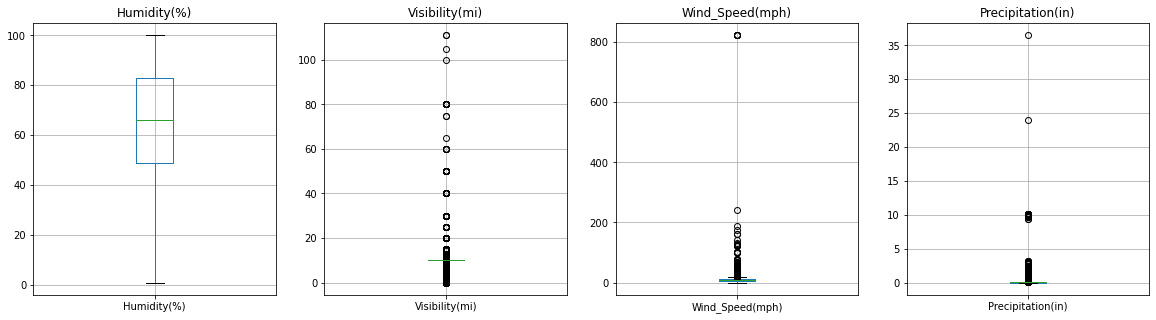

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

newdf[['Humidity(%)']].boxplot(ax=axes[0])
axes[0].set_title('Humidity(%)')

newdf[['Visibility(mi)']].boxplot(ax=axes[1])
axes[1].set_title('Visibility(mi)')

newdf[['Wind_Speed(mph)']].boxplot(ax=axes[2])
axes[2].set_title('Wind_Speed(mph)')

newdf[['Precipitation(in)']].boxplot(ax=axes[3])
axes[3].set_title('Precipitation(in)')

plt.show()

as we can see, there are a lot of outliers in the dataset, so let's remove them

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Visibility(mi)'>

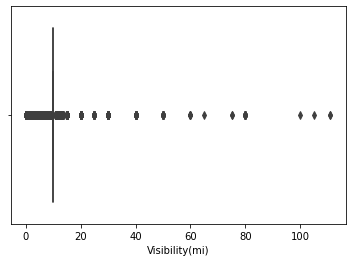

In [90]:
sns.boxplot(newdf['Visibility(mi)'])

Looks like there is a lot of outliers, so we decide to replace some outliers with the mean value

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Visibility(mi)'>

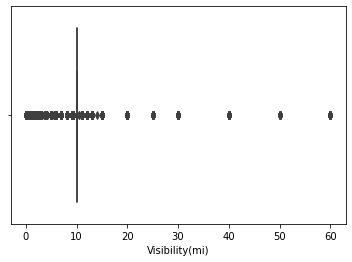

In [91]:
newdf.loc[newdf['Visibility(mi)'] > 60, 'Visibility(mi)'] = 60

sns.boxplot(newdf['Visibility(mi)'])

As we can see, actually, there is a huge amount of "10" values, so the other values are more rare, so we can decide to keep it this way or to delete them. We chose to delete them, as they are not representative

Let's deal with every columns that contains outliers now.

In [92]:
Q1= newdf['Wind_Speed(mph)'].quantile(0.25)
Q3= newdf['Wind_Speed(mph)'].quantile(0.75)
IQR = Q3 - Q1
moyenne = newdf['Wind_Speed(mph)'].mean()

threshold = 1.5

newdf.loc[(df['Wind_Speed(mph)'] < Q1 - threshold * IQR), 'Wind_Speed(mph)'] = moyenne
newdf.loc[(df['Wind_Speed(mph)'] > Q3 + threshold * IQR), 'Wind_Speed(mph)'] = moyenne

#precipitaion

Q1= newdf['Precipitation(in)'].quantile(0.25)
Q3= newdf['Precipitation(in)'].quantile(0.75)
IQR = Q3 - Q1

threshold = 3


moyenne_precipitation = newdf['Precipitation(in)'].median()
newdf.loc[(df['Precipitation(in)'] < Q1 - threshold * IQR), 'Precipitation(in)'] = moyenne_precipitation
newdf.loc[(df['Precipitation(in)'] > Q3 + threshold * IQR), 'Precipitation(in)'] = moyenne_precipitation

#wind chill
Q1= newdf['Wind_Chill(F)'].quantile(0.25)
Q3= newdf['Wind_Chill(F)'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5


moyenne_windchill = newdf['Wind_Chill(F)'].median()
newdf.loc[(df['Wind_Chill(F)'] < Q1 - threshold * IQR), 'Wind_Chill(F)'] = moyenne_windchill
newdf.loc[(df['Wind_Chill(F)'] > Q3 + threshold * IQR), 'Wind_Chill(F)'] = moyenne_windchill

#Temperature

Q1= newdf['Temperature(F)'].quantile(0.25)
Q3= newdf['Temperature(F)'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5


moyenne_temp = newdf['Temperature(F)'].median()
newdf.loc[(df['Temperature(F)'] < Q1 - threshold * IQR), 'Temperature(F)'] = moyenne_temp
newdf.loc[(df['Temperature(F)'] > Q3 + threshold * IQR), 'Temperature(F)'] = moyenne_temp

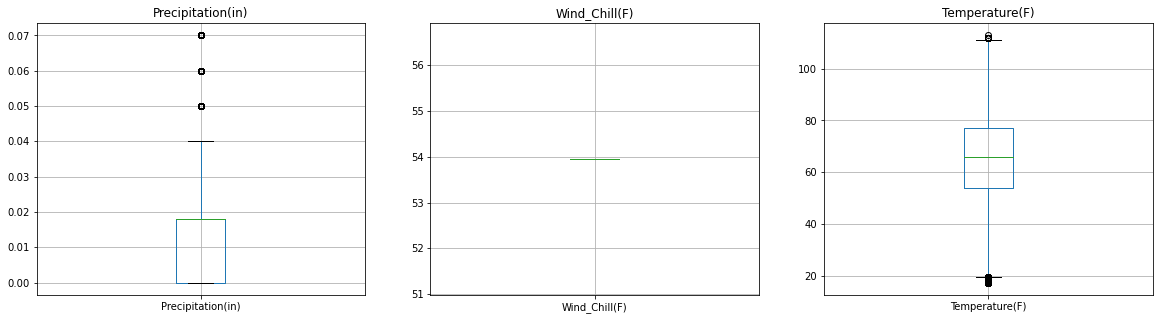

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

newdf[['Precipitation(in)']].boxplot(ax=axes[0])
axes[0].set_title('Precipitation(in)')

newdf[['Wind_Chill(F)']].boxplot(ax=axes[1])
axes[1].set_title('Wind_Chill(F)')

newdf[['Temperature(F)']].boxplot(ax=axes[2])
axes[2].set_title('Temperature(F)')

plt.show()

# Question 3

The variables we can predict are probably the severity of an accident, and maybe a start time.

Based on our intuition, we think that the most important variables to predict the severity of an accident would be the weather condition variables like Humidity, Wind Speed, Pressure, etc. And probably the time of the day like Day or Night.

## Univariate Analysis

Let's do a histogram

(array([ 38279.,      0.,      0., 454686.,      0.,      0., 278071.,
             0.,      0.,   1803.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

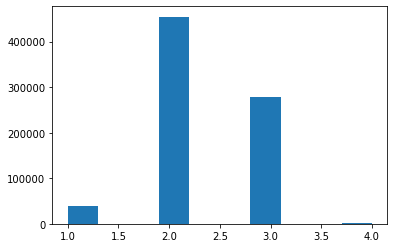

In [94]:
plt.hist(newdf['Severity'])

(array([207455.,      0.,      0.,      0.,      0., 563753.,      0.,
             0.,      0.,   1631.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

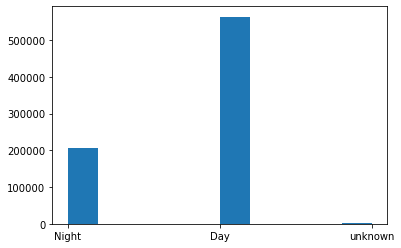

In [95]:
plt.hist(newdf['Sunrise_Sunset'])

(array([  3185.,  16842.,  36086.,  59520.,  87625., 105391., 125690.,
        112759., 128963.,  96778.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

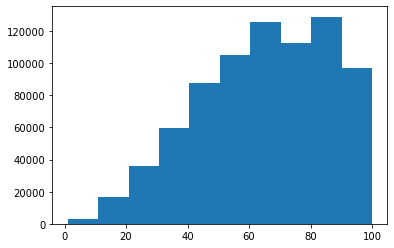

In [96]:
plt.hist(newdf['Humidity(%)'])

(array([8.00000e+00, 1.00000e+00, 0.00000e+00, 4.00000e+02, 5.93060e+04,
        7.13112e+05, 1.00000e+01, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 0.12 ,  5.918, 11.716, 17.514, 23.312, 29.11 , 34.908, 40.706,
        46.504, 52.302, 58.1  ]),
 <BarContainer object of 10 artists>)

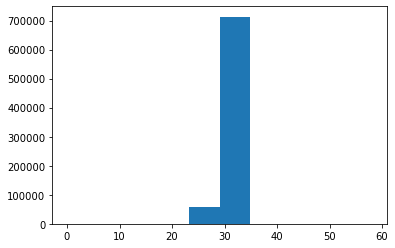

In [97]:
plt.hist(newdf['Pressure(in)'])

As we can see, in most case, there is high humidity, more, accidents with 0% humidity are very rare according to the histogram.
Most accidents happen with 7.5 mph, during the day, with a 30/35 in of pressure.

## Bivariate Analysis

Let's do some correlation matrices to understand which variables are the most impactful on the severity.

<AxesSubplot:>

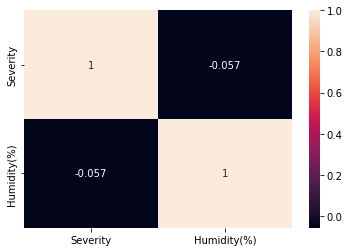

In [98]:
correl1 = newdf.loc[:, ['Severity', 'Humidity(%)']]
corr_matrix = correl1.corr()
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot:>

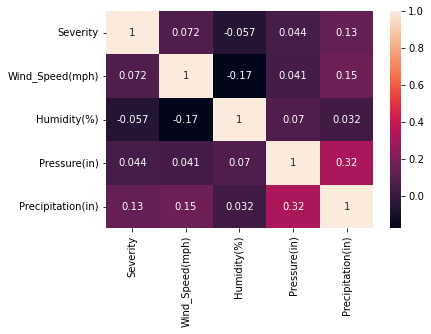

In [99]:
correl1 = newdf.loc[:, ['Severity', 'Wind_Speed(mph)','Humidity(%)','Pressure(in)', 'Precipitation(in)']]
corr_matrix = correl1.corr()
sns.heatmap(corr_matrix, annot=True)

So we can here see the correlation between the severity and the other chosen quantitative variable. The highest are the precipitation and the wind speed.

# Question 4

Here we are going to do a linear regression to predict values of new data for the dataset. 
Based on our intuition, we think that the most important variables to predict the severity of an accident would be the weather condition variables like Humidity or the time of the day like Day or Night, or even where it happened (what is on a stop, or a traffic sign ?)...


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [101]:
newdf.info() #We check again which colomns we have and their type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772839 entries, 0 to 772838
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                772839 non-null  float64
 8   End_Lng                772839 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  State                  772839 non-null  object 
 11  Timezone               772839 non-null  object 
 12  Weather_Timestamp      772839 non-null  object 
 13  Temperature(F)         772839 non-null  float64
 14  Wind_Chill(F)          772839 non-nu

In [102]:
# Define target variable and predictor variables
X = newdf[['Visibility(mi)','Weather_Condition','Crossing','Junction','Station','Traffic_Signal','Stop','State','Precipitation(in)']] 
y = newdf['Severity']

After many test, to see which variables we should tale we decided to go with variable containing location informations (stop, state, traffic_signal...), variables linked to the condition (visibility, weather condition...).

In [103]:
# hot encoding on 'Weather_Condition' and 'State' columns as they are string colomns
X_encoded = pd.get_dummies(X, columns=['Weather_Condition','State'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [104]:
# Fit the linear regression model on the encoded data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

# Where a higher value indicates a better fit of the model to the data.

Training R^2 score: 0.16863392666708577
Testing R^2 score: 0.1679867619812785


We got a Training R^2 score of around 0.09004. Knowing that the training R^2 score measures how well the model fits the training data. A high training R^2 score indicates that the model explains a large proportion of the variance in the training data. 

The testing R^2 score measures how well the model generalizes to new, unseen data. This is crucial because the ultimate goal of a machine learning model is to make accurate predictions on new data. Here we have a higher testing score then a training score, while still behind close in value. Having a much higher testing score indicates overfitting.

Like we said earlier we tested the model with many differents variables to see which had the biggest impact on the dataset, and this is the combination that made us have the highest score for both the training and the testing score. Still, the number for both training and testing are very low (as it variates between 0 and 1). This may indicated us that the model is underfitting, meaning it's too simplistic. We can deduce that it's not explaining much of the variance in the data overall, this may be because there are so many variables, they don't have much significance overall on the dataset...

In [106]:
#Now we can get the coefficients
coefficients = model.coef_
intercept = model.intercept_

In [107]:
# Here we display all coefficients 
print("Intercept:", intercept)
for i, variable in enumerate(X_encoded.columns):
    print(f"Coefficient for {variable}: {coefficients[i]}")

Intercept: 2.3822758900140757
Coefficient for Visibility(mi): 0.0063542653304584475
Coefficient for Crossing: -0.1456635887025032
Coefficient for Junction: 0.1515932944111737
Coefficient for Station: -0.11753959436229344
Coefficient for Traffic_Signal: -0.26365010408467404
Coefficient for Stop: -0.3210100136388791
Coefficient for Precipitation(in): 3.311423985076066
Coefficient for Weather_Condition_Blowing Dust / Windy: -0.1557679172552589
Coefficient for Weather_Condition_Blowing Sand: 0.2638343452401323
Coefficient for Weather_Condition_Blowing Snow: -0.031511730571170224
Coefficient for Weather_Condition_Blowing Snow / Windy: 0.2804876935200046
Coefficient for Weather_Condition_Clear: -0.16877007700087232
Coefficient for Weather_Condition_Cloudy: -0.20599044373121655
Coefficient for Weather_Condition_Cloudy / Windy: -0.06905604229474457
Coefficient for Weather_Condition_Drizzle: -0.06609251400621415
Coefficient for Weather_Condition_Drizzle and Fog: -0.1580230692523265
Coefficient 

Our intercept value is of 2.14 approximatly. This means when all of our independent variables are zero, the model predicts that the value of the Severity will be around 2.13. 

As we can see, there are so many variables, all of the coefficients are, in the end, very low. A coefficient close to zero suggests that the presence or absence of drifting snow as a weather condition has almost no impact on the Severity of accidents. 
As there are many coefficient, to see a little bit better we can display only the one that interest us by choosing value bigger then a number, like so :

In [108]:
# We display all coefficients with a high number = high impact on Severity
print("Intercept:", intercept)
for i, variable in enumerate(X_encoded.columns):
    if abs(coefficients[i]) > 0.5:
        print(f"Coefficient for {variable}: {coefficients[i]}")

Intercept: 2.3822758900140757
Coefficient for Precipitation(in): 3.311423985076066
Coefficient for Weather_Condition_Heavy Freezing Rain: -0.5018774997559942
Coefficient for Weather_Condition_Light Fog: 0.5259659849503883
Coefficient for Weather_Condition_Light Haze: -0.5909266256780177
Coefficient for Weather_Condition_Light Thunderstorms and Snow: 0.5915018161483894
Coefficient for Weather_Condition_Smoke / Windy: -0.5442137280351891
Coefficient for Weather_Condition_Snow and Thunder: -0.5307289750304316
Coefficient for Weather_Condition_Tornado: -1.5332616336964031
Coefficient for Weather_Condition_Volcanic Ash: -0.6315939237925258
Coefficient for State_WV: 0.5471573631563038


As we can see, all bad weather condition have a very positive impact on the Severity of the Accident. Precipitation have a huge impact, which is surprising because we would have though the visibility would be more important. 

Either then precipitation, only some weather condition have a big impact (like duststormn, blowing snow).

In [109]:
# We display all coefficient with a low number = low impact on Severity
for i, variable in enumerate(X_encoded.columns):
    if abs(coefficients[i]) < 0.1:
        print(f"Coefficient for {variable}: {coefficients[i]}")

Coefficient for Visibility(mi): 0.0063542653304584475
Coefficient for Weather_Condition_Blowing Snow: -0.031511730571170224
Coefficient for Weather_Condition_Cloudy / Windy: -0.06905604229474457
Coefficient for Weather_Condition_Drizzle: -0.06609251400621415
Coefficient for Weather_Condition_Fog / Windy: -0.005601977746902057
Coefficient for Weather_Condition_Freezing Drizzle: -8.337774914934926e-14
Coefficient for Weather_Condition_Hail: -5.495603971894525e-14
Coefficient for Weather_Condition_Haze / Windy: 0.0009585394121334623
Coefficient for Weather_Condition_Heavy Drizzle: -0.04050210507797125
Coefficient for Weather_Condition_Heavy Rain: -0.07697715588762621
Coefficient for Weather_Condition_Heavy Rain / Windy: 0.01152113690691757
Coefficient for Weather_Condition_Heavy Rain Showers: -1.0658141036401503e-13
Coefficient for Weather_Condition_Heavy Snow: 0.005254011363070271
Coefficient for Weather_Condition_Heavy Snow / Windy: 0.040471989059708474
Coefficient for Weather_Condition

The results are a bit surprising as we could think visibility could have a bigger impact on the Severity, however it is not the case. A lot of weather condition also have a low impact, but this could be because there is not enought data with all these types of weather. As we can see above, weather does have an impact on the severity. 
We would have also though that Crossing, Junction and Station had bigger coefficient overall. 

It could be interesting to see which coefficients have a medium impact (between 0.1 and 0.5).

In [110]:
# We display all coefficient with a medium number = mldium impact on Severity
for i, variable in enumerate(X_encoded.columns):
    if 0.1 <= abs(coefficients[i]) <= 0.5:
        print(f"Coefficient for {variable}: {coefficients[i]}")

Coefficient for Crossing: -0.1456635887025032
Coefficient for Junction: 0.1515932944111737
Coefficient for Station: -0.11753959436229344
Coefficient for Traffic_Signal: -0.26365010408467404
Coefficient for Stop: -0.3210100136388791
Coefficient for Weather_Condition_Blowing Dust / Windy: -0.1557679172552589
Coefficient for Weather_Condition_Blowing Sand: 0.2638343452401323
Coefficient for Weather_Condition_Blowing Snow / Windy: 0.2804876935200046
Coefficient for Weather_Condition_Clear: -0.16877007700087232
Coefficient for Weather_Condition_Cloudy: -0.20599044373121655
Coefficient for Weather_Condition_Drizzle and Fog: -0.1580230692523265
Coefficient for Weather_Condition_Fair: -0.2700610967853556
Coefficient for Weather_Condition_Fair / Windy: -0.13261319817892125
Coefficient for Weather_Condition_Fog: -0.2205702596612753
Coefficient for Weather_Condition_Freezing Rain: 0.3602532301806878
Coefficient for Weather_Condition_Funnel Cloud: 0.1561029077598208
Coefficient for Weather_Conditi

And here we can see all coefficients that have a medium impact on the data. We can find mostly Weather condition has there are so many of them, as well as state locations. The asb(stop) coefficient is very close to 0.1, which is kind of low. As well as for Crossing, junction and Station, we would have though Stop had a higher coefficient. 

# Question 5

For this part, make sure you have xgboost installed on your computer (this can be done by running 'pip install xgboost' 
or 'conda install xgboost' if you are using anaconda)

We are going to use XGBoost because XGBoost is known for its high performance in terms of accuracy and execution time. It uses an optimization algorithm that gradually improves models, leading to more accurate results.

In [111]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [112]:
X2 = newdf[['Visibility(mi)','Crossing','Junction','Station','Traffic_Signal','Stop','Precipitation(in)']] 
y2 = newdf['Severity']
y2 -= 1 #we do this because we need to start at 0.

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [113]:
# Build XGBoost model
model2 = XGBClassifier()

# Train model
model2.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [114]:
# Make predictions
y_pred2 = model2.predict(X_test2)

In [115]:
# Evaluate model
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.6007129548160033


The result we obtained is very good. An accuracy of 0.79 shows that the model is making correct predictions for roughly 79.62% of the instances for our dataset. 
The model has demonstrated some ability to generalize and make predictions on unseen data. It's able to capture underlying patterns in the data to a reasonable extent.

# Question 6

For this part we are using the library shap. You can download it using pip install shap or conda install shap regarding of what you use.

In [116]:
import shap
shap.initjs()

In [117]:
explainer = shap.TreeExplainer(model2)

In [118]:
shap_values = explainer.shap_values(X_test2)
print(shap_values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[array([[-0.05864221, -0.02712917,  0.01745853, ..., -0.09581508,
        -0.03851198, -2.5225952 ],
       [-0.01009728, -0.04307869,  0.02852044, ..., -0.1594181 ,
        -0.02247054,  1.0253984 ],
       [-0.05981549, -0.04314301,  0.03059567, ..., -0.15193935,
        -0.02023954,  0.8926722 ],
       ...,
       [-0.30834806, -0.0569404 ,  0.01401372, ..., -0.06904592,
        -0.02131207, -2.6082363 ],
       [-0.01009728, -0.04307869,  0.02852044, ..., -0.1594181 ,
        -0.02247054,  1.0253984 ],
       [-0.30834806, -0.0569404 ,  0.01401372, ..., -0.06904592,
        -0.02131207, -2.6082363 ]], dtype=float32), array([[ 0.05876158, -0.0351943 ,  0.01858515, ..., -0.1725795 ,
        -0.03035627,  0.06758504],
       [-0.02164531, -0.02139089,  0.0098792 , ..., -0.12636083,
        -0.01979531, -0.17388394],
       [ 0.09420802, -0.02351297,  0.01058054, ..., -0.13242629,
        -0.0219545 , -0.10151766],
       ...,
       [ 0.00341321, -0.03531133,  0.01884921, ..., -0.165

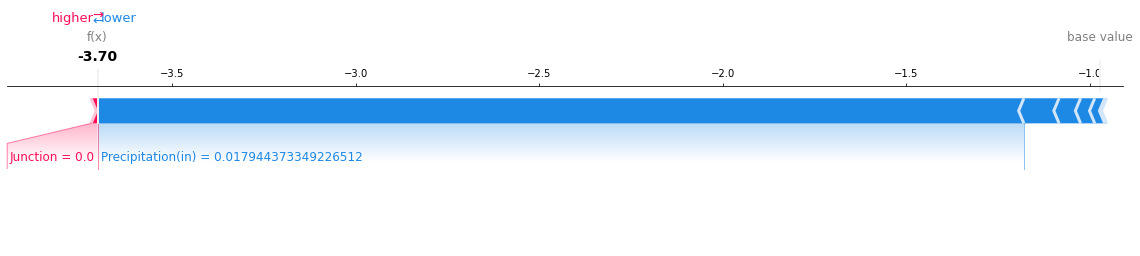

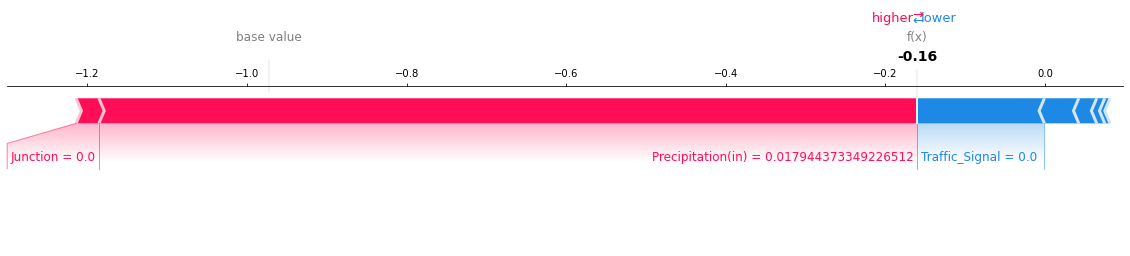

In [119]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test2.iloc[0,:], matplotlib=True)
shap.force_plot(explainer.expected_value[0], shap_values[0][1,:], X_test2.iloc[1041,:], matplotlib=True)

The two graphs just above are showing the impact of the variables on one instance of our dataset. Here, the first one and the 50th one. In the graph below, we will have a better view of the variable's impact on every instance.

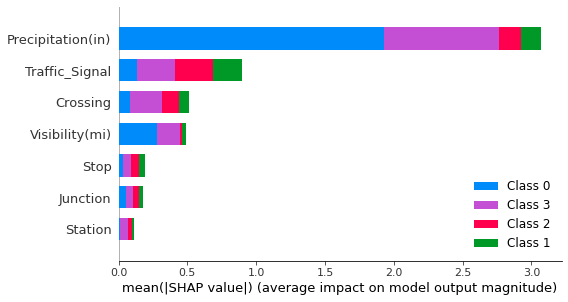

In [120]:
shap.summary_plot(shap_values, X_test2, plot_type="bar")

Here, we can see that the precipitation will have a great impact on every severity, and especially for the most severe accident (class 3). And for the number of traffic signals, we see that it has a big impact on the light accident (class 1 and class 2).

Compared to the linear regression, it comforts us with the choice of Precipitation influencing the severity. But, we had a coefficient of -0.12 for the traffic signals, and here we can see that it has a certain impact on the severity of an accident. It's the same thing for the variables Crossing and Visiblity that didn't have much impact on the linear regression. 

Let's do the beeswarms plot, with a dataframe with the most important variables

In [121]:
important_variables = X_test2[['Precipitation(in)', 'Traffic_Signal', 'Crossing', 'Visibility(mi)']].copy()

# Ajout de la variable Severity
important_variables['Severity'] = y_test2.copy()

In [ ]:
#plt.figure(figsize=(10, 6))

# Precipitation
sns.swarmplot(data=important_variables, x='Severity', y='Precipitation(in)', size=3, hue='Severity', palette='Set1')
plt.xlabel('Severity')
plt.ylabel('Precipitation(in)')
plt.title('Beeswarm Plot of Precipitation')
plt.show()

In [ ]:
# Traffic Signals
sns.swarmplot(x='Severity', y='Traffic_Signals', data=important_variables, size=2, hue='Severity', palette='Set1')
plt.xlabel('Severity')
plt.ylabel('Number of traffic signals')
plt.title('Beeswarm Plot for traffic signals')
plt.show()

In [ ]:
# Crossing
sns.swarmplot(x='Severity', y='Crossing', data=important_variables, size=3, hue='Severity', palette='Set1')
plt.xlabel('Severity')
plt.ylabel('Number of Crossing')
plt.title('Beeswarm Plot for Crossings')
plt.show()

# Question 7